Uploading and Import necessary packages

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Stage01.

Importing Libraries: Standard practice is to import Pandas for data manipulation and NumPy for numerical operations.,1. Import necessary libraries.

"Data Loading: Pandas' read_csv() function is essential for loading flat file data into a DataFrame, the primary data structure for analysis.",2. Load the dataset into a Pandas DataFrame.

"Data Structure Check: Use .head(), .info(), and .shape to get a quick overview of the data's size, column names, data types, and presence of missing values.",3. Use basic DataFrame methods.

In [4]:
#Load the DataSet
df = pd.read_csv('Titanic-Dataset.csv')

In [5]:
#print the first 5 rows of the dataset
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [6]:
#check the data structure and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#check the dimensions
print(df.shape)

(891, 12)


Stage 2:
 Descriptive Statistics and Data Cleaning (EDA)
This stage involves summarizing the data and handling common issues like missing values and inconsistent formats.

Descriptive Statistics: The .describe() function gives a summary (mean, median, min, max, std dev) of numerical columns. For categorical columns, use .value_counts() and .nunique() to check distribution and variety.	1. Summarize numerical and categorical features.

Missing Values (NA): Missing data is common. Use .isnull().sum() to identify the count of missing values per column. Critical function for data quality.	2. Identify and count missing values.

Handling Missing Data: Imputation (filling with mean, median, or mode) or Dropping (removing the rows/columns) are common strategies. Example: Fill missing 'Age' with the median. 3. Handle missing data in a numerical column.

In [8]:
#Descriptive statistic
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [9]:
#distribution of catogorical column
print(df['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [10]:
#check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [11]:
# Handling missing values

# --- AGE: Impute grouped medians ---
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

# --- EMBARKED: Fill with mode ---
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# --- CABIN: Create binary indicator then drop cabin ---
df['HasCabin'] = df['Cabin'].notnull().astype(int)
df.drop('Cabin', axis=1, inplace=True)

# Check again
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
HasCabin       0
dtype: int64


/tmp/ipython-input-52428519.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [13]:
#slicing using first 10 entires of relevant column
df['Name'].head(10)

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,"Nasser, Mrs. Nicholas (Adele Achem)"


In [14]:
df[['Name', 'Sex', 'Age']].head(10)

,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0
5,"Moran, Mr. James",male,25.0
6,"McCarthy, Mr. Timothy J",male,54.0
7,"Palsson, Master. Gosta Leonard",male,2.0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0
9,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0


In [15]:
type(df["Survived"])

pandas.core.series.Series

,Age
0,False
1,True
2,True
3,True
4,True
...,...
886,True
887,False
888,False
889,True


In [22]:
# users younger than 30 or male
df[(df.Age < 30) | (df.Sex == 'male')]




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


In [23]:
# users younger than 30 and male
df[(df.Age < 30) & (df.Sex == 'male')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,Q,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,S,0
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q,0
...,...,...,...,...,...,...,...,...,...,...,...,...
878,879,0,3,"Laleff, Mr. Kristo",male,25.0,0,0,349217,7.8958,S,0
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,S,0
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S,0
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0


In [24]:
df.query("Age < 30 or Sex == 'male'")
df.query("Age < 30 and Sex == 'male'")


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,Q,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,S,0
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q,0
...,...,...,...,...,...,...,...,...,...,...,...,...
878,879,0,3,"Laleff, Mr. Kristo",male,25.0,0,0,349217,7.8958,S,0
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,S,0
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S,0
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0


#.loc and .iloc functions


In [26]:
#Select rows by index label
df.loc[10]

,10
PassengerId,11
Survived,1
Pclass,3
Name,"Sandstrom, Miss. Marguerite Rut"
Sex,female
Age,4.0
SibSp,1
Parch,1
Ticket,PP 9549
Fare,16.7


In [27]:
#Select multiple rows by labels
df.loc[5:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,1


In [28]:
#select columns by the name
df.loc[:, 'Age']


,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,21.5
889,26.0


In [31]:
df.loc[5:10, ['Name','Age', 'Sex']]


,Name,Age,Sex
5,"Moran, Mr. James",25.0,male
6,"McCarthy, Mr. Timothy J",54.0,male
7,"Palsson, Master. Gosta Leonard",2.0,male
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,female
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,female
10,"Sandstrom, Miss. Marguerite Rut",4.0,female


In [32]:
#.iloc — Position-based Selection
#select first row
df.iloc[0]


,0
PassengerId,1
Survived,0
Pclass,3
Name,"Braund, Mr. Owen Harris"
Sex,male
Age,22.0
SibSp,1
Parch,0
Ticket,A/5 21171
Fare,7.25


In [33]:
#select first 3 rows
df.iloc[0:3]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0


In [34]:
#select rows and columns by index
df.iloc[0:5, 0:3]    # first 5 rows, first 3 columns


,PassengerId,Survived,Pclass
0,1,0,3
1,2,1,1
2,3,1,3
3,4,1,1
4,5,0,3


Feature Engineering and Visualization

In [15]:
# Step 1: Feature Engineering - Create 'FamilySize'
df['FamilySize'] = df['SibSp'] + df['Parch'] +1
print(df['FamilySize'].describe())

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamilySize, dtype: float64


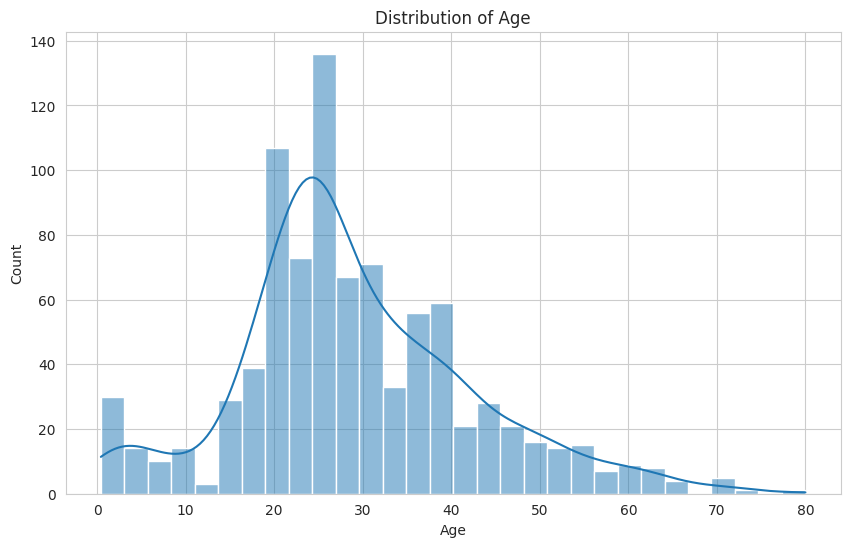

In [18]:
# Set the visualization style
sns.set_style("whitegrid")

#Univariate Plot (Distribution of Age)
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

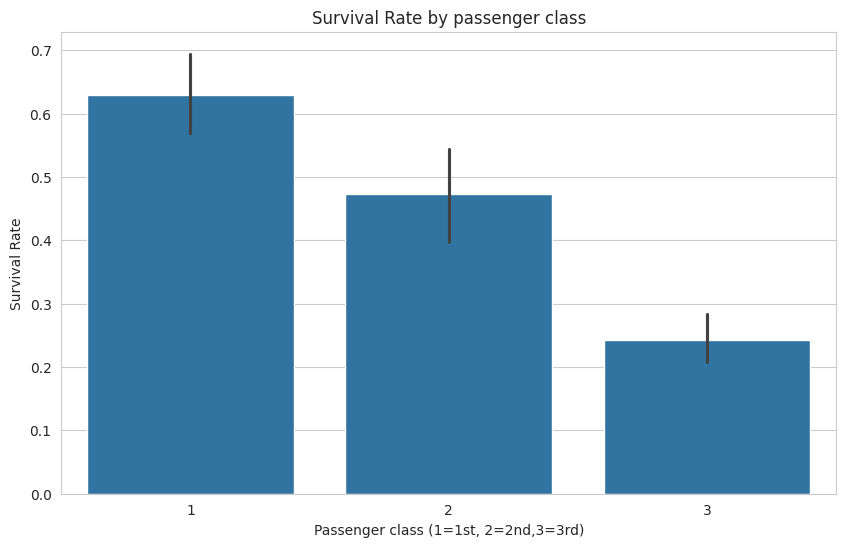

In [19]:
#Bivariate Plot (Survival Rate by Passenger Class)
plt.figure (figsize= (10,6))
sns.barplot(x='Pclass', y='Survived', data =df)
plt.title('Survival Rate by passenger class')
plt.xlabel('Passenger class (1=1st, 2=2nd,3=3rd)')
plt.ylabel('Survival Rate')
plt.show()




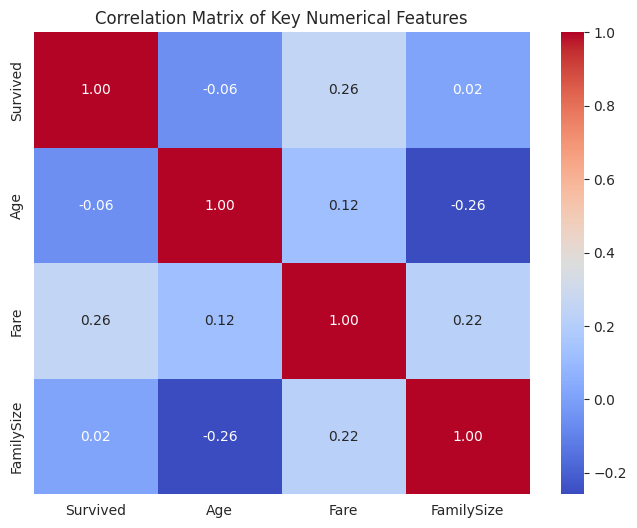

In [20]:
#Correlation Heatmap
# Theory: A correlation matrix and heatmap show linear relationships between variables.
# 1 = perfect positive correlation, -1 = perfect negative correlation.
correlation_matrix = df[['Survived', 'Age', 'Fare', 'FamilySize']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Numerical Features')
plt.show()